# Questão 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import dataframe_image as dfi
import scipy

In [2]:
for i in range(2,7):
    folder = f'q{i}'
    if not os.path.exists(folder):
        os.makedirs(f'./q{i}')

In [3]:
chromecast = pd.read_csv('./data/dataset_chromecast.csv', dtype={'device_id':np.int64, 'bytes_up':np.float64, 'bytes_down':np.float64}, parse_dates=['date_hour'])
smartv = pd.read_csv('./data/dataset_smart-tv.csv', dtype={'device_id':np.int64, 'bytes_up':np.float64, 'bytes_down':np.float64}, parse_dates=['date_hour'])

In [4]:
# chromecast['log_bytes_up'] = np.log10(chromecast['bytes_up'], where=chromecast['bytes_up']>0)
# chromecast['log_bytes_down'] = np.log10(chromecast['bytes_down'], where=chromecast['bytes_down']>0)
# smartv['log_bytes_up'] = np.log10(smartv['bytes_up'], where=smartv['bytes_up']>0)
# smartv['log_bytes_down'] = np.log10(smartv['bytes_down'], where=smartv['bytes_down']>0)

chromecast['log_bytes_up'] = np.log10(chromecast['bytes_up'] +1)
chromecast['log_bytes_down'] = np.log10(chromecast['bytes_down'] +1)
smartv['log_bytes_up'] = np.log10(smartv['bytes_up'] +1)
smartv['log_bytes_down'] = np.log10(smartv['bytes_down'] +1)

chromecast['date_hour_filtered'] = pd.to_datetime(chromecast['date_hour'].dt.date) + pd.to_timedelta(chromecast['date_hour'].dt.hour, unit='h')
smartv['date_hour_filtered'] = pd.to_datetime(smartv['date_hour'].dt.date) + pd.to_timedelta(smartv['date_hour'].dt.hour, unit='h')


In [5]:
chromecast

device_id           date_hour     bytes_up    bytes_down  \
0         66161985 2021-09-06 00:01:00  2987.016393  49185.704918   
1         66161985 2021-09-06 00:02:00   685.935484    328.258065   
2         66161985 2021-09-06 00:03:00  4493.901639  37914.064516   
3         66161985 2021-09-06 00:04:00   776.133333    229.200000   
4         66161985 2021-09-06 00:05:00  3081.311475  51656.800000   
...            ...                 ...          ...           ...   
1620524   90339988 2021-11-26 16:52:00  2024.000000  43432.000000   
1620525   90339988 2021-11-26 16:53:00  7088.000000   1592.000000   
1620526   90339988 2021-11-26 16:54:00   488.000000  49632.000000   
1620527   90339988 2021-11-26 16:55:00     0.000000    136.000000   
1620528   90339988 2021-11-26 16:57:00     0.000000     96.000000   

         log_bytes_up  log_bytes_down  date_hour_filtered  
0            3.475383        4.691848 2021-09-06 00:00:00  
1            2.836916        2.517536 2021-09-06 00:00:00  
2            3.652720        4.578812 2021-09-06 00:00:00  
3            2.890496        2.362105 2021-09-06 00:00:00  
4            3.488877        4.713136 2021-09-06 00:00:00  
...               ...             ...                 ...  
1620524      3.306425        4.637820 2021-11-26 16:00:00  
1620525      3.850585        3.202216 2021-11-26 16:00:00  
1620526      2.689309        4.695771 2021-11-26 16:00:00  
1620527      0.000000        2.136721 2021-11-26 16:00:00  
1620528      0.000000        1.986772 2021-11-26 16:00:00  

[1620529 rows x 7 columns]

In [6]:
smartv

device_id           date_hour       bytes_up    bytes_down  \
0         77209603 2021-11-22 15:23:00  132932.983607  2.818140e+06   
1         77209603 2021-11-22 15:24:00  115770.491803  2.264410e+06   
2         77209603 2021-11-22 15:25:00  114030.032787  2.309270e+06   
3         77209603 2021-11-22 15:26:00   97170.622951  2.006544e+06   
4         77209603 2021-11-22 15:27:00   39569.573770  8.061440e+05   
...            ...                 ...            ...           ...   
4417898   40241962 2021-11-25 23:19:00       8.000000  8.000000e+00   
4417899   40241962 2021-11-25 23:21:00       8.000000  8.000000e+00   
4417900   40241962 2021-11-25 23:23:00       8.000000  8.000000e+00   
4417901   40241962 2021-11-25 23:25:00       8.000000  8.000000e+00   
4417902   40241962 2021-11-25 23:26:00       8.000000  3.200000e+01   

         log_bytes_up  log_bytes_down  date_hour_filtered  
0            5.123636        6.449963 2021-11-22 15:00:00  
1            5.063602        6.354955 2021-11-22 15:00:00  
2            5.057023        6.363475 2021-11-22 15:00:00  
3            4.987539        6.302449 2021-11-22 15:00:00  
4            4.597372        5.906413 2021-11-22 15:00:00  
...               ...             ...                 ...  
4417898      0.954243        0.954243 2021-11-25 23:00:00  
4417899      0.954243        0.954243 2021-11-25 23:00:00  
4417900      0.954243        0.954243 2021-11-25 23:00:00  
4417901      0.954243        0.954243 2021-11-25 23:00:00  
4417902      0.954243        1.518514 2021-11-25 23:00:00  

[4417903 rows x 7 columns]

# Questão 2

In [7]:
chromecast_stats = pd.DataFrame(chromecast.iloc[:,4:].describe())
smartv_stats = pd.DataFrame(smartv.iloc[:,4:].describe())
chromecast_stats.loc['var'] = chromecast_stats.loc['std']**2
smartv_stats.loc['var'] = smartv_stats.loc['std']**2
stats = ['mean', 'var', 'std']
chromecast_stats = chromecast_stats.loc[stats]
smartv_stats = smartv_stats.loc[stats]

In [8]:
chromecast_stats, smartv_stats

(      log_bytes_up  log_bytes_down
 mean      3.350300        3.800046
 var       0.459969        1.663896
 std       0.678210        1.289921,
       log_bytes_up  log_bytes_down
 mean      2.158288        2.351679
 var       4.110139        6.721324
 std       2.027348        2.592552)

In [9]:
dfi.export(chromecast_stats, './q2/q2_general_stats_chromecast.png')
dfi.export(smartv_stats, './q2/q2_general_stats_smartv.png')
chromecast_stats.to_csv('./q2/q2_general_stats_chromecast.csv')
smartv_stats.to_csv('./q2/q2_general_stats_smartv.csv')

In [10]:
def nbins_sturges(n): # Sturges method
    return int(np.ceil(1 + 3.322*np.log10(n)))

C:\Users\arthu\AppData\Local\Temp\ipykernel_30468\1071364387.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


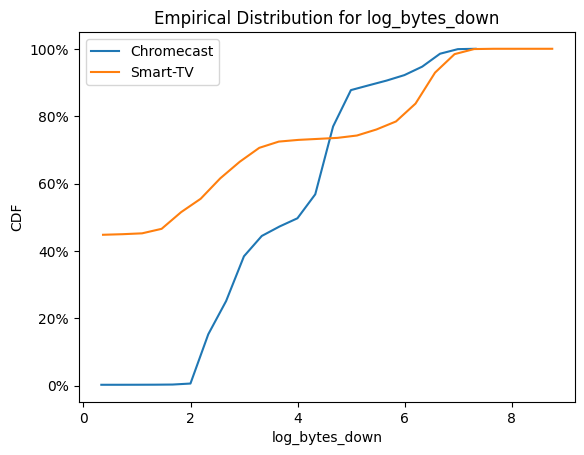

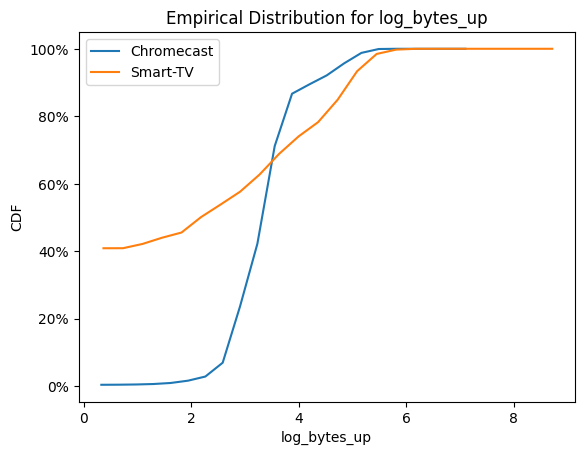

In [11]:
for field in ['log_bytes_down', 'log_bytes_up']:
    fig, ax = plt.subplots()
    nbins =  nbins_sturges(chromecast[field].size)
    count, bins_count = np.histogram(chromecast[field], bins=nbins)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    
    ax.plot(bins_count[1:], cdf, label=f"Chromecast")

    nbins =  int(np.ceil(1 + 3.322*np.log10(smartv[field].size))) # Sturges method
    count, bins_count = np.histogram(smartv[field], bins=nbins)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ax.plot(bins_count[1:], cdf, label=f"Smart-TV")

    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    plt.legend()
    plt.title(f"Empirical Distribution for {field}")
    plt.xlabel(f"{field}")
    plt.ylabel("CDF")
    plt.savefig(f"./q2/q2_empirical_dist_{field}.png")
    

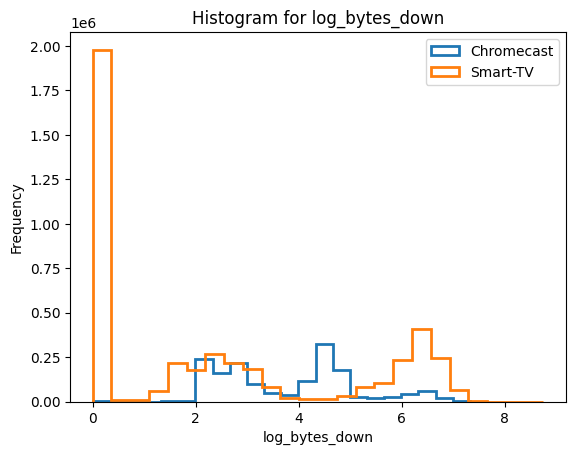

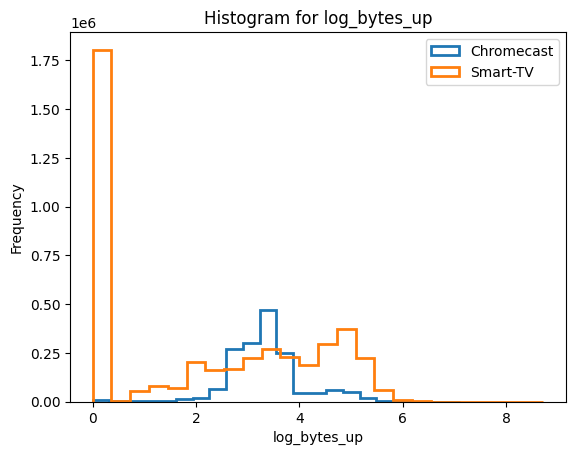

In [12]:
for field in ['log_bytes_down', 'log_bytes_up']:
    fig, ax = plt.subplots()

    nbins =  nbins_sturges(chromecast[field].size) # Sturges method
    ax.hist(chromecast[field], bins=nbins, label=f"Chromecast", histtype='step', linewidth=2)

    nbins =  nbins_sturges(smartv[field].size) # Sturges method
    ax.hist(smartv[field], bins=nbins, label=f"Smart-TV", histtype='step', linewidth=2)

    plt.xlabel(field)
    plt.ylabel("Frequency")
    plt.legend()
    plt.title(f"Histogram for {field}")
    plt.savefig(f"./q2/q2_histogram_{field}.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


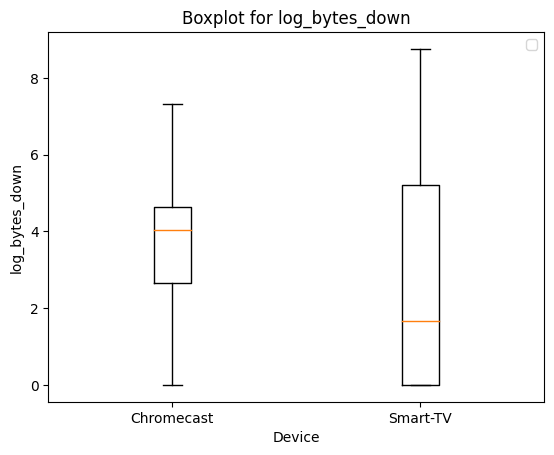

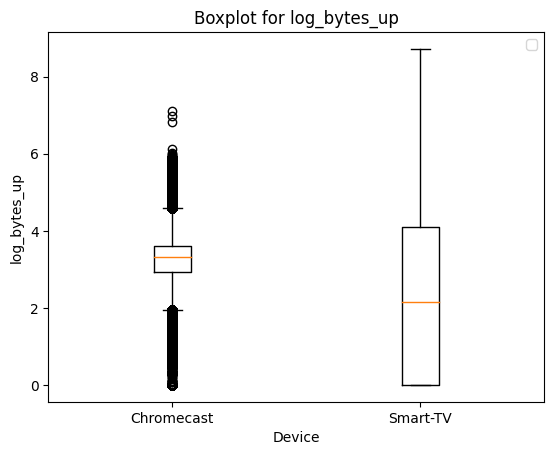

In [13]:
for field in ['log_bytes_down', 'log_bytes_up']:
    fig, ax = plt.subplots()
    ax.boxplot([chromecast[field],smartv[field]], labels=["Chromecast", "Smart-TV"])
    plt.legend()
    plt.xlabel("Device")
    plt.ylabel(field)
    plt.title(f"Boxplot for {field}")
    plt.savefig(f"./q2/q2_boxplot_{field}.png")

# Questão 3

                    log_bytes_down                    
                               var      mean       std
date_hour                                             
2021-09-06 00:00:00       2.509808  4.007324  1.584237
2021-09-06 01:00:00       1.817802  3.745627  1.348259
2021-09-06 02:00:00       1.123765  3.385951  1.060078
2021-09-06 03:00:00       1.062015  3.246570  1.030541
2021-09-06 04:00:00       0.966950  3.278943  0.983336
                    log_bytes_down                    
                               var      mean       std
date_hour                                             
2021-09-06 00:00:00       6.044588  1.549780  2.458574
2021-09-06 01:00:00       4.119896  0.991671  2.029753
2021-09-06 02:00:00       3.472161  0.817763  1.863373
2021-09-06 03:00:00       3.408343  0.784249  1.846170
2021-09-06 04:00:00       3.620736  0.826869  1.902823
                    log_bytes_up                    
                             var      mean       std
date_hour     

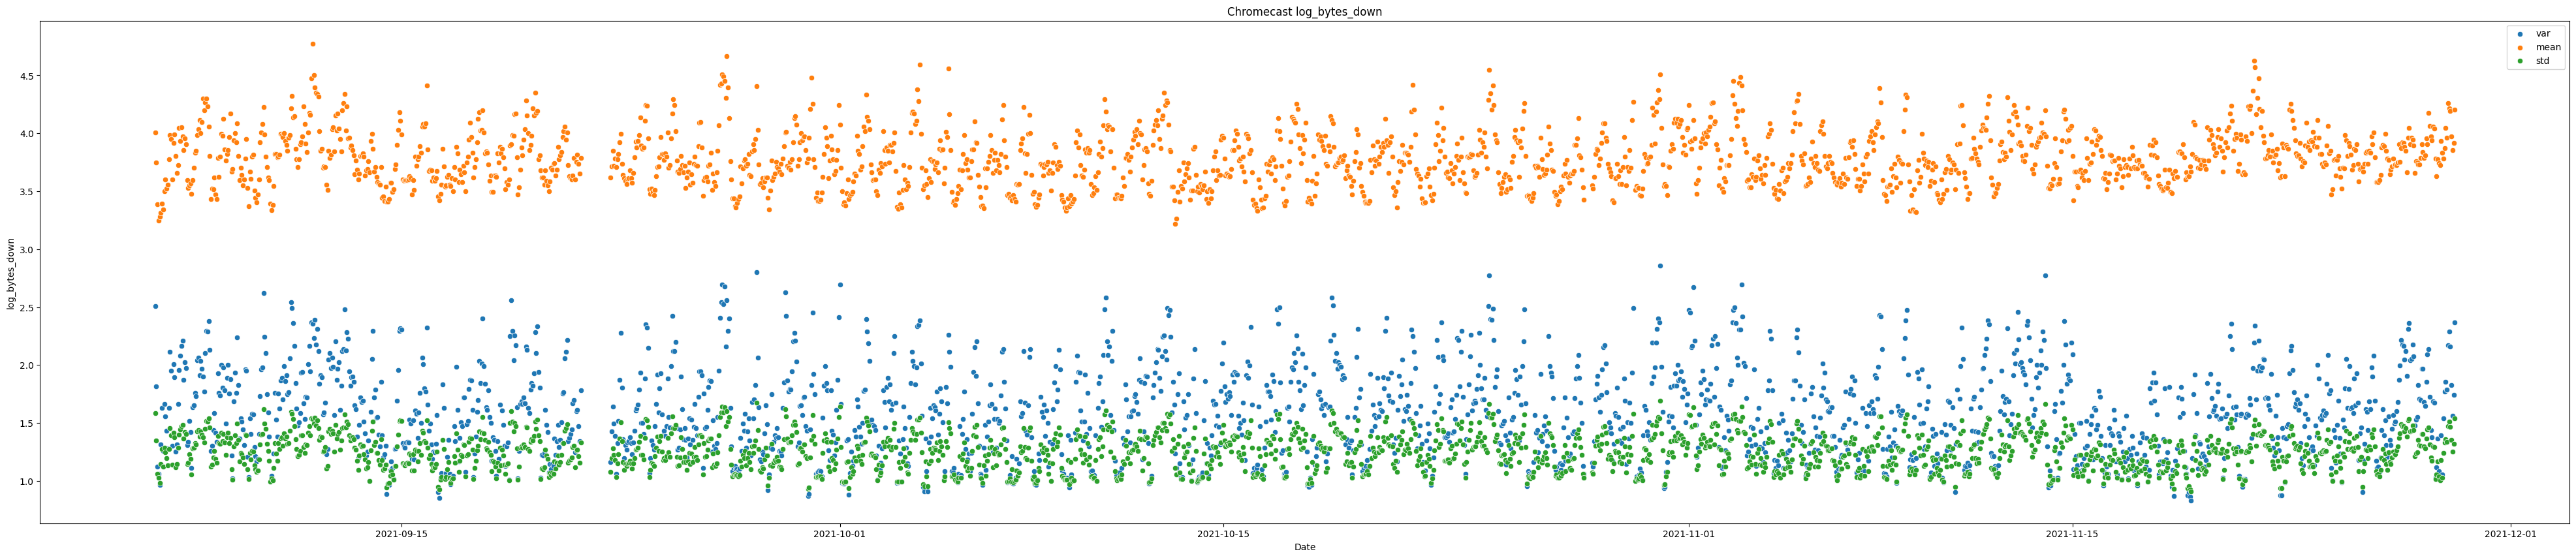

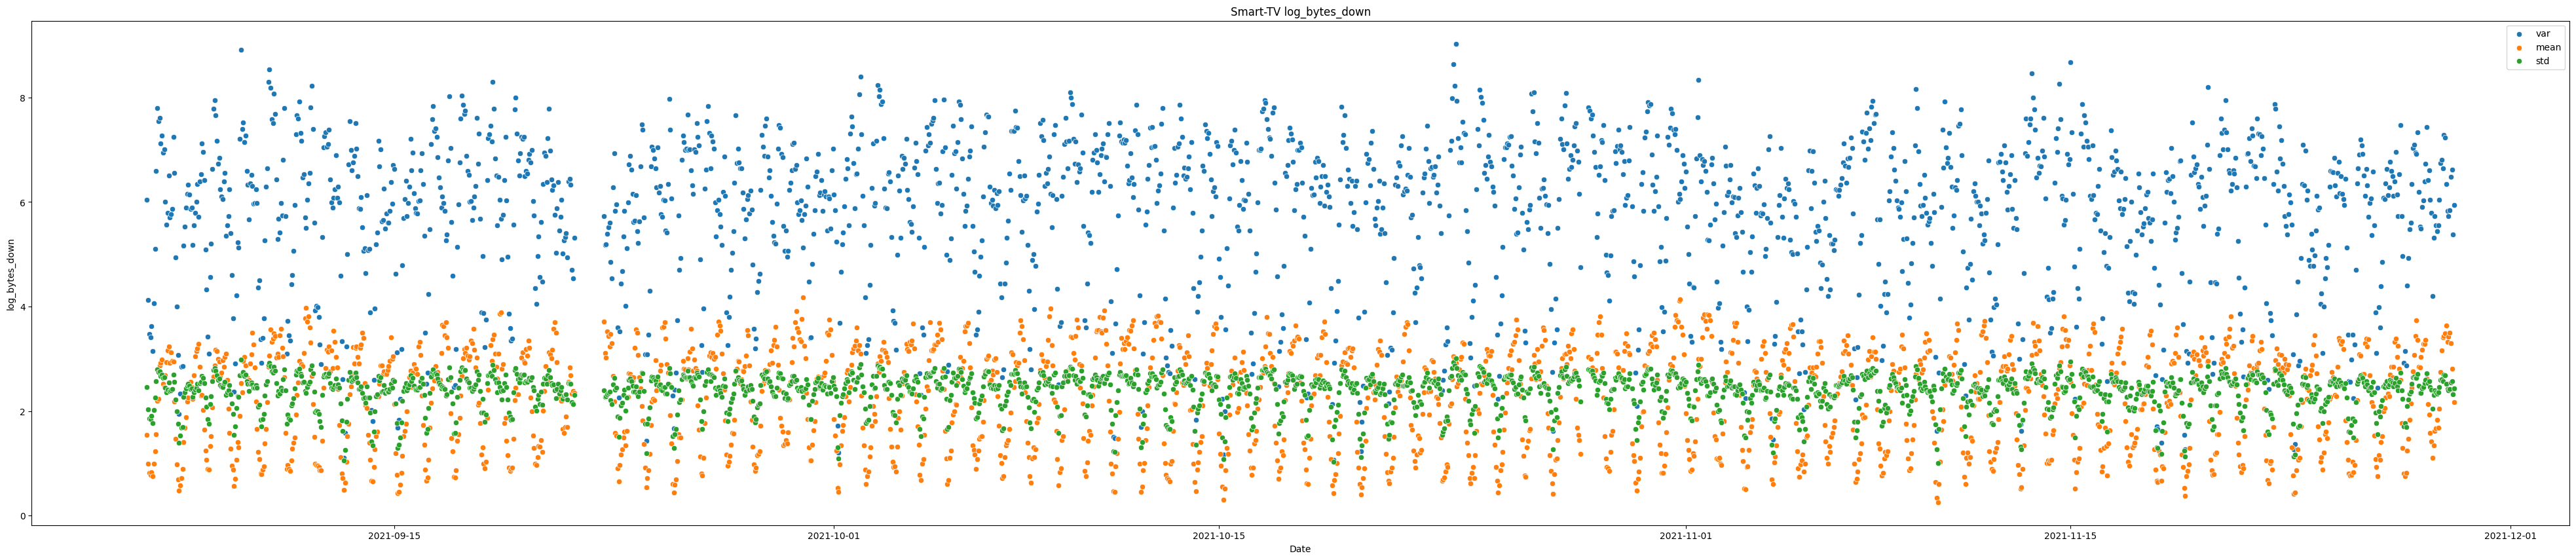

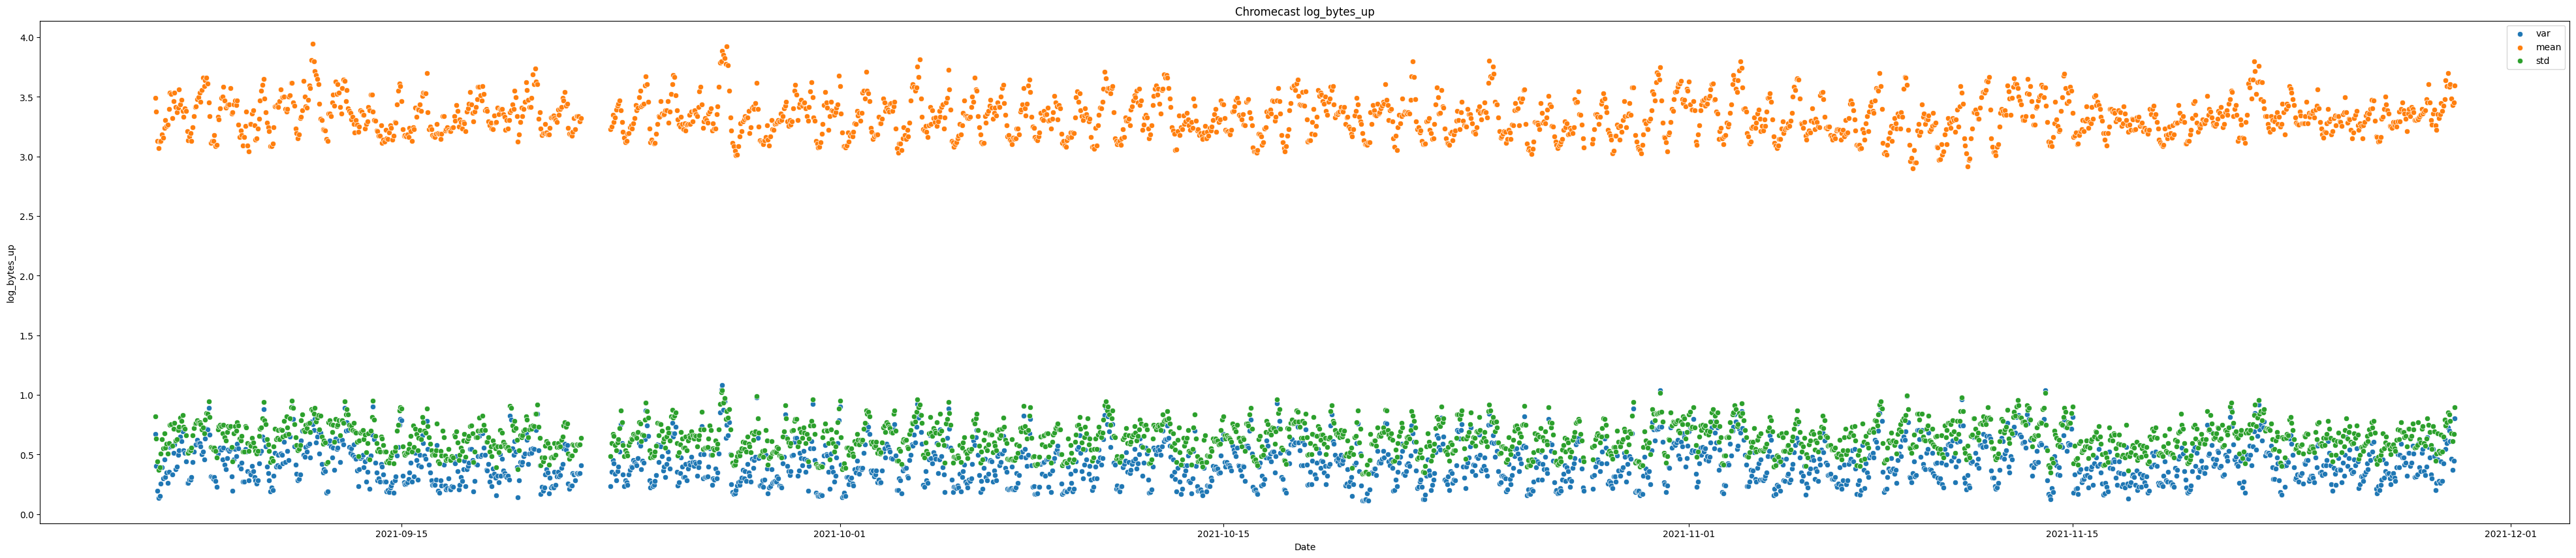

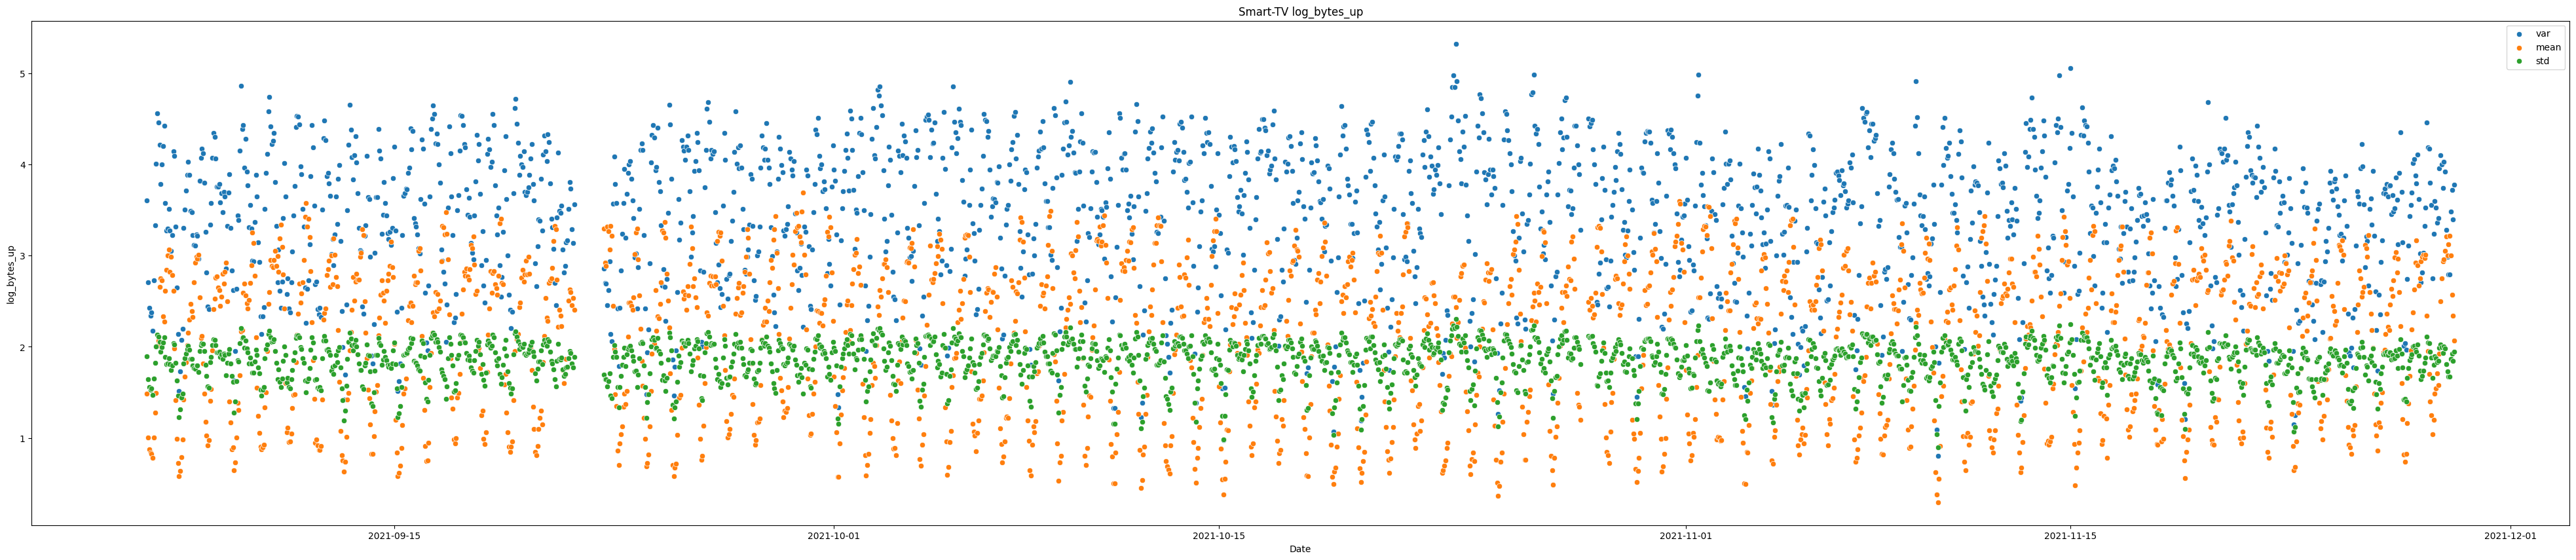

In [14]:
for field in ['log_bytes_down', 'log_bytes_up']:
    aggregated_data = chromecast.resample('H', on='date_hour').agg({f'{field}':['var', 'mean', 'std']})
    print(aggregated_data.head())
    aggregated_data.to_csv(f"./q3/q3_stats_chromecast_{field}.csv")
    fig, ax = plt.subplots(figsize=(50,10))
    sns.scatterplot(ax=ax, x=aggregated_data.index, y=aggregated_data[field]['var'], label='var')
    sns.scatterplot(ax=ax, x=aggregated_data.index, y=aggregated_data[field]['mean'], label='mean')
    sns.scatterplot(ax=ax, x=aggregated_data.index, y=aggregated_data[field]['std'], label='std')
    plt.title(f"Chromecast {field}")
    plt.xlabel("Date")
    plt.ylabel(f"{field}")
    plt.savefig(f"./q3/q3_scatter_chromecast_{field}.png")

    aggregated_data = smartv.resample('H', on='date_hour').agg({f'{field}':['var', 'mean', 'std']})
    print(aggregated_data.head())
    aggregated_data.to_csv(f"./q3/q3_stats_smartv_{field}.csv")
    fig, ax = plt.subplots(figsize=(50,10))
    sns.scatterplot(ax=ax, x=aggregated_data.index, y=aggregated_data[field]['var'], label='var')
    sns.scatterplot(ax=ax, x=aggregated_data.index, y=aggregated_data[field]['mean'], label='mean')
    sns.scatterplot(ax=ax, x=aggregated_data.index, y=aggregated_data[field]['std'], label='std')
    plt.title(f"Smart-TV {field}")
    plt.xlabel("Date")
    plt.ylabel(f"{field}")
    plt.savefig(f"./q3/q3_scatter_smartv_{field}.png")

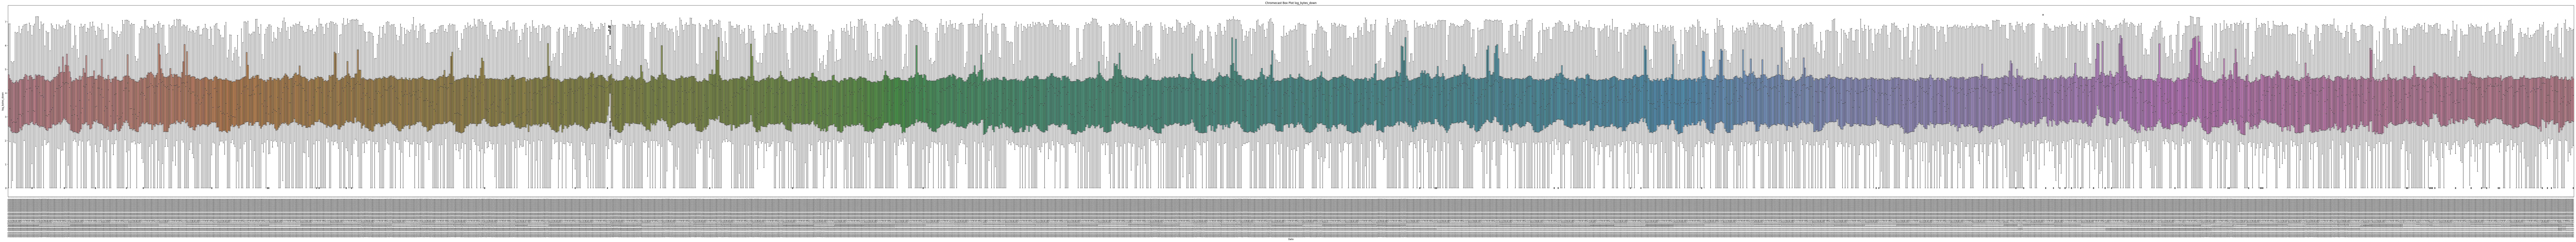

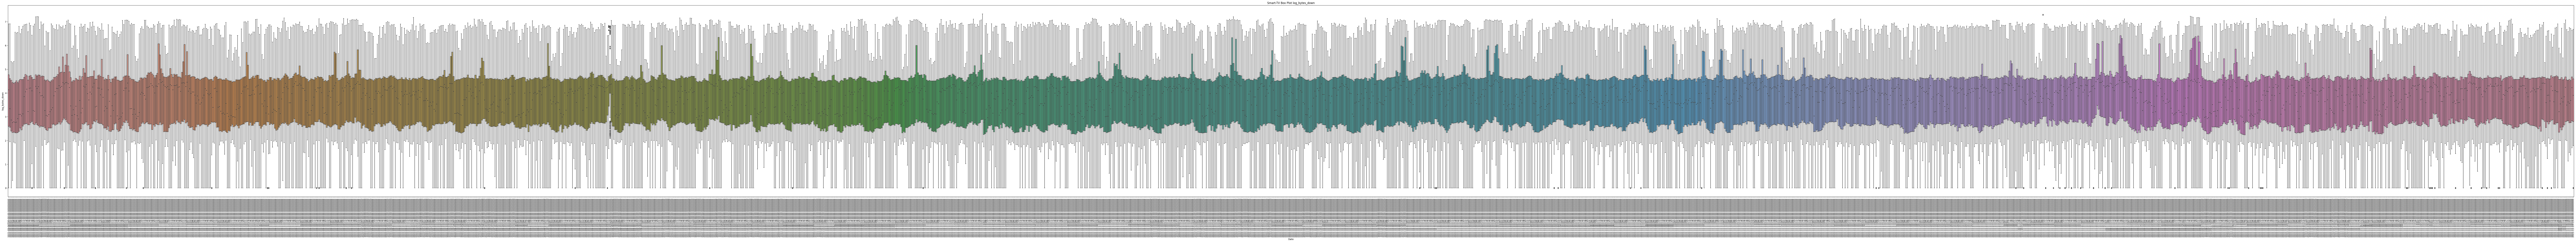

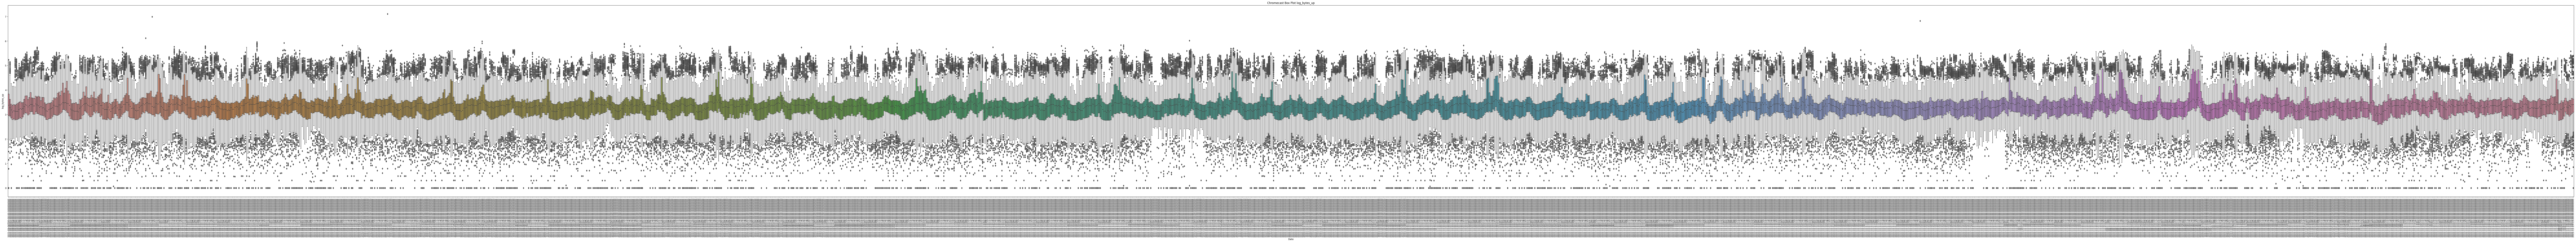

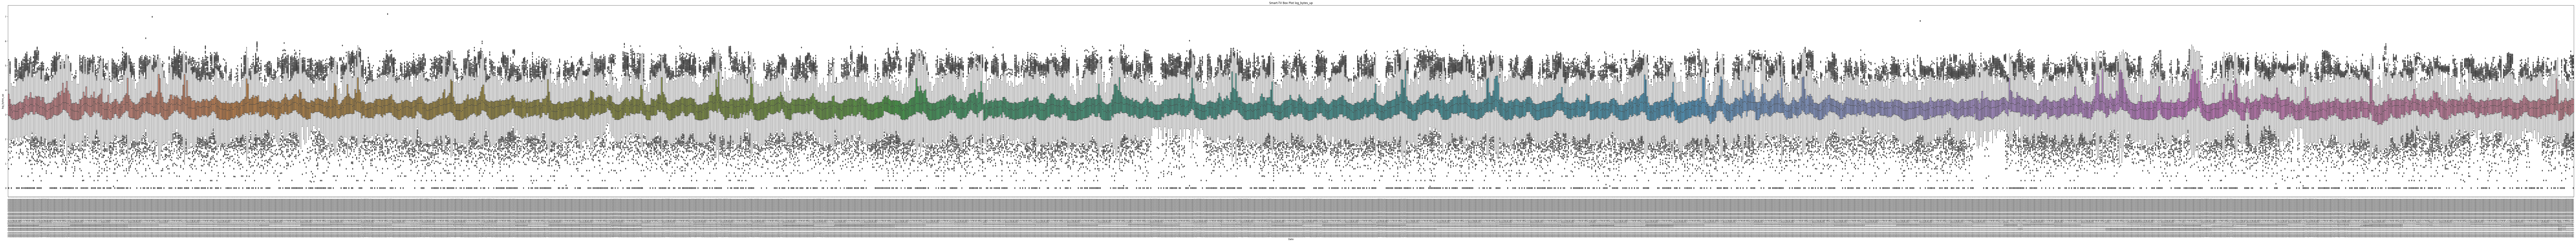

In [15]:
for field in ['log_bytes_down', 'log_bytes_up']:
    
    fig, ax = plt.subplots(figsize=(200, 15))
    sns.boxplot(x=chromecast['date_hour_filtered'], y=chromecast[field], ax=ax)
    plt.xticks(rotation=90)
    plt.title(f"Chromecast Box Plot {field}")
    plt.xlabel("Date")
    plt.ylabel(f"{field}")
    plt.savefig(f"./q3/q3_chromecast_boxplot_{field}.png")

    fig, ax = plt.subplots(figsize=(200, 15))
    sns.boxplot(x=chromecast['date_hour_filtered'], y=chromecast[field], ax=ax)
    plt.xticks(rotation=90)
    plt.title(f"Smart-TV Box Plot {field}")
    plt.xlabel("Date")
    plt.ylabel(f"{field}")
    plt.savefig(f"./q3/q3_smartv_boxplot_{field}.png")


# Questão 4

In [20]:
datasets = []
for device_name, device in zip(['Smart-TV', 'Chromecast'], [smartv, chromecast]):
    for field in ['log_bytes_up', 'log_bytes_down']:
        for stat in ['median', 'mean']:
            data = device.resample('H', on='date_hour').agg({f'{field}':[stat]})
            data_hour_max = data.where(data == data.max()).dropna().index[0]

            dataset = device.where(device['date_hour_filtered'] == data_hour_max).dropna()
            dataset['q4_device'] = device_name
            dataset['q4_stat'] = stat
            dataset['q4_field'] = field
            if stat == 'median':
                dataset['q4_stat_down_value'] = dataset['log_bytes_down'].median()
                dataset['q4_stat_up_value'] = dataset['log_bytes_up'].median()
            elif stat == 'mean':
                dataset['q4_stat_down_value'] = dataset['log_bytes_down'].mean()
                dataset['q4_stat_up_value'] = dataset['log_bytes_up'].mean()
            datasets.append(dataset)
            dataset.to_csv(f"./q4/q4_{device_name}_{field}_max_{stat}.csv")

            fig, ax = plt.subplots()
            device_color = 'tab:orange' if device_name == 'Smart-TV' else 'tab:blue'
            nbins = nbins_sturges(dataset.size)
            sns.histplot(dataset[field], bins=nbins, ax=ax, label=f"{device_name}", color=device_color, stat='density')
            
            gaussian_params = scipy.stats.norm.fit(dataset[field])
            gamma_params = scipy.stats.gamma.fit(dataset[field], floc=-1, fscale=1)

            x = np.linspace(dataset[field].min(), dataset[field].max(), 1000)
            y_gamma = scipy.stats.gamma.pdf(x, *gamma_params)
            plt.plot(x, y_gamma, linewidth=2, label=f'gamma pdf, alpha:{gamma_params[0]:.3f}, loc:{gamma_params[1]:.0f}, scale:{gamma_params[2]:.0f}', color='tab:purple')

            y_gaussian = scipy.stats.norm.pdf(x, *gaussian_params)
            plt.plot(x, y_gaussian, linewidth=2, label=f'gaussian pdf, mu:{gaussian_params[0]:.3f}, sigma:{gaussian_params[1]:.3f}', color='tab:green')
            
            plt.vlines(np.mean(dataset[field]), ymin=0, ymax=0.5, linestyles='--', label='mean', colors='tab:olive')
            plt.vlines(np.median(dataset[field]), ymin=0, ymax=0.5, linestyles='--', label='median', colors='tab:pink')

            plt.xlabel(field)
            plt.ylabel("Normalized frequency")
            plt.legend()
            plt.title(f"{device_name}-{field}-{stat} data-hour of max: {data_hour_max}; max value: {data.max()[0]}")
            plt.savefig(f"./q4/q4_histogram_{device_name}_{field}_max_{stat}.png")

            plt.close()

            fig, ax = plt.subplots(1,2, figsize=(15,5))
            plt.title('AAA')
            scipy.stats.probplot(dataset[field], sparams = gamma_params, dist='gamma', plot=ax[0])
            scipy.stats.probplot(dataset[field], sparams = gaussian_params, dist='norm', plot=ax[1])
            ax[0].set_title('Gamma')
            ax[1].set_title('Gaussian')
            plt.savefig(f"./q4/q4_probplot_{device_name}_{field}_max_{stat}.png")
            plt.close()
            # print(f"{device_name} {field} {stat} max: {data_hour_max} => {data.max()}")
            # print(dataset)
            # print()

# Questão 5

In [21]:
for i, device_name in zip([2,3,6,7], ['Smart-TV', 'Smart-TV', 'Chromecast', 'Chromecast']):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    sns.scatterplot(data=datasets[i], x='date_hour', y='log_bytes_down', ax=ax, label='log_bytes_down', s=15)
    sns.scatterplot(data=datasets[i], x='date_hour', y='log_bytes_up', ax=ax, label='log_bytes_up', s=15)
    plt.title(f"Scatterplot for {device_name} max {datasets[i].iloc[0]['q4_stat']}")
    plt.xlabel("Date-hour")
    plt.ylabel("log_bytes")
    plt.savefig(f"./q5/q5_scatterplot_{device_name}_{datasets[i].iloc[0]['q4_stat']}.png")
    plt.close()
    corr = datasets[i][['log_bytes_down', 'log_bytes_up']].corr()
    corr.to_csv(f"./q5/q5_corr_{device_name}_{datasets[i].iloc[0]['q4_stat']}.csv")
    print(f"Correlation for {device_name} max {datasets[i].iloc[0]['q4_stat']}")
    print(corr)
    corr.to_csv(f"./q4/q4_corr_{device_name}_{datasets[i].iloc[0]['q4_stat']}.csv")

Correlation for Smart-TV max median
                log_bytes_down  log_bytes_up
log_bytes_down        1.000000      0.949281
log_bytes_up          0.949281      1.000000
Correlation for Smart-TV max mean
                log_bytes_down  log_bytes_up
log_bytes_down        1.000000      0.926102
log_bytes_up          0.926102      1.000000
Correlation for Chromecast max median
                log_bytes_down  log_bytes_up
log_bytes_down        1.000000      0.872077
log_bytes_up          0.872077      1.000000
Correlation for Chromecast max mean
                log_bytes_down  log_bytes_up
log_bytes_down        1.000000      0.872077
log_bytes_up          0.872077      1.000000
